In [1]:
import tushare as tsr
import pandas as pd
import os
tsr.set_token('160d53ba8bbf501af124f4ca00a2c781482fd4b32ddfdffafc24d760')
ts = tsr.pro_api()

# 获取深证指数2022年的交易数据
# Ping An Insurance (Group) Company Of China Ltd
if(os.path.exists('a.csv') == False):
    data1 = ts.query('daily', ts_code='000001.SZ', start_date='20150101', end_date='20221230')
    data1['trade_date'] = pd.to_datetime(data1['trade_date'], format='%Y%m%d')
    data1.to_csv('a.csv')
    print(data1.head())
# NAURA Technology Group Co Ltd
if(os.path.exists('b.csv') == False):
    data2 = ts.query('daily', ts_code='002371.SZ', start_date='20150101', end_date='20221230')
    data2['trade_date'] = pd.to_datetime(data2['trade_date'], format='%Y%m%d')
    data2.to_csv('b.csv')
    print(data2.head())

     ts_code trade_date   open   high    low  close  pre_close  change  \
0  000001.SZ 2022-12-30  13.04  13.28  12.96  13.16      13.03    0.13   
1  000001.SZ 2022-12-29  13.07  13.13  12.85  13.03      13.14   -0.11   
2  000001.SZ 2022-12-28  13.16  13.38  13.00  13.14      13.11    0.03   
3  000001.SZ 2022-12-27  12.87  13.22  12.87  13.11      12.77    0.34   
4  000001.SZ 2022-12-26  12.99  13.04  12.71  12.77      12.98   -0.21   

   pct_chg        vol       amount  
0   0.9977  818035.98  1074756.754  
1  -0.8371  666890.09   865144.967  
2   0.2288  791191.98  1042402.080  
3   2.6625  886004.12  1160090.119  
4  -1.6179  797119.87  1021903.963  
     ts_code trade_date    open    high     low   close  pre_close  change  \
0  002371.SZ 2022-12-30  230.20  230.79  224.25  225.30     227.64   -2.34   
1  002371.SZ 2022-12-29  225.28  231.33  223.93  227.64     224.80    2.84   
2  002371.SZ 2022-12-28  225.80  227.32  222.01  224.80     227.52   -2.72   
3  002371.SZ 2022-12-

In [2]:
import yfinance as yf

if(os.path.exists('c.csv') == False):
    # 创建一个Ticker对象
    ticker = yf.Ticker("AAPL")
    # 获取过去5年的日线数据
    data = ticker.history(start="2015-01-01", end="2022-12-30")
    data = pd.DataFrame(data)
    data.to_csv('c.csv')
    data = pd.read_csv('c.csv')
    data = data.rename(mapper={'Date':'trade_date','Open':'open','Close':'close','High':'high', 'Low':'low', 'Volume':'volume'}, axis=1)
    data['trade_date'] = pd.to_datetime(data.iloc[:, 0], utc=True).dt.date
    data.to_csv('c.csv')
    # 打印数据
    print(data.iloc[:,0])

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

1947
1876
2013


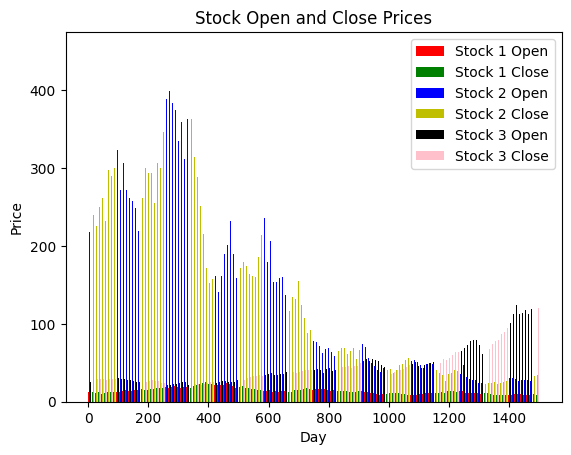

In [9]:
#https://finance.yahoo.com/quote/AAPL/history?period1=1420070400&period2=1672358400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
import matplotlib.pyplot as plt
import pandas as pd
# 输入数据，分别为两只股票的开盘价和收盘价
data1 = pd.read_csv('a.csv')
data2 = pd.read_csv('b.csv')
data3 = pd.read_csv('c.csv')
print(data1.shape[0])
print(data2.shape[0])
print(data3.shape[0])
stock1_open = data1['open'][:1500]
stock1_close = data1['close'][:1500]
stock2_open = data2['open'][:1500]
stock2_close = data2['close'][:1500]
stock3_open = data3['Open'][:1500]
stock3_close = data3['Close'][:1500]
# 计算每个柱子的宽度
bar_width = 0.16

# 计算每个柱子的位置
bar_positions1 = range(len(stock1_open))
bar_positions2 = [p + 2*bar_width for p in bar_positions1]
bar_positions3 = [p + 2*bar_width for p in bar_positions2]

# 创建画布和子图
fig, ax = plt.subplots()

# 绘制第一只股票的开盘价柱子
ax.bar(bar_positions1, stock1_open, bar_width, color='r', label='Stock 1 Open')

# 绘制第一只股票的收盘价柱子
ax.bar([p + bar_width for p in bar_positions1], stock1_close, bar_width, color='g', label='Stock 1 Close')

# 绘制第二只股票的开盘价柱子
ax.bar(bar_positions2, stock2_open, bar_width, color='b', label='Stock 2 Open')

# 绘制第二只股票的收盘价柱子
ax.bar([p + bar_width for p in bar_positions2], stock2_close, bar_width, color='y', label='Stock 2 Close')

# 绘制第三只股票的开盘价柱子
ax.bar(bar_positions3, stock3_open, bar_width, color='k', label='Stock 3 Open')

# 绘制第二只股票的收盘价柱子
ax.bar([p + bar_width for p in bar_positions3], stock3_close, bar_width, color='pink', label='Stock 3 Close')
# 设置x轴标签和标题
ax.set_xlabel('Day')
ax.set_ylabel('Price')
ax.set_title('Stock Open and Close Prices')

# 添加图例
ax.legend()

# 显示图形
plt.show()


In [10]:
print("Sotck's mean open price!")
print(stock1_open.mean())
print(stock2_open.mean())
print(stock3_open.mean())

print("Sotck's mean close price!")
print(stock1_close.mean())
print(stock2_close.mean())
print(stock3_close.mean())

Sotck's mean open price!
13.991686666666666
137.54619333333332
45.486077891188586
Sotck's mean close price!
14.00492
137.93276666666668
45.51727573903402


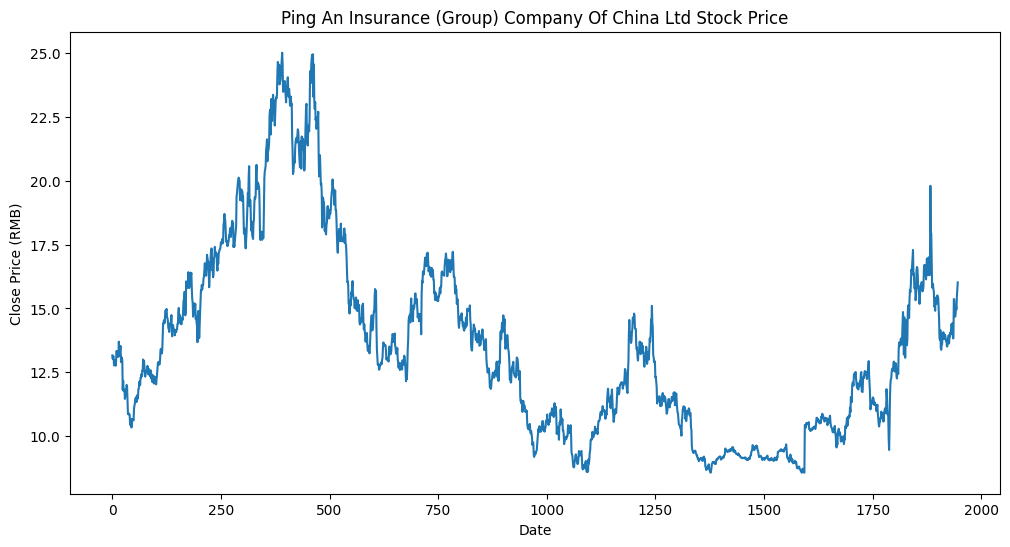

In [11]:
# Ping An Insurance (Group) Company Of China Ltd
# 设置图形参数
plt.figure(figsize=(12, 6))
plt.title("Ping An Insurance (Group) Company Of China Ltd Stock Price")
plt.xlabel("Date")
plt.ylabel("Close Price (RMB)")

# 绘制股票变化曲线
plt.plot(data1.index, data1['close'])

# 显示图形
plt.show()

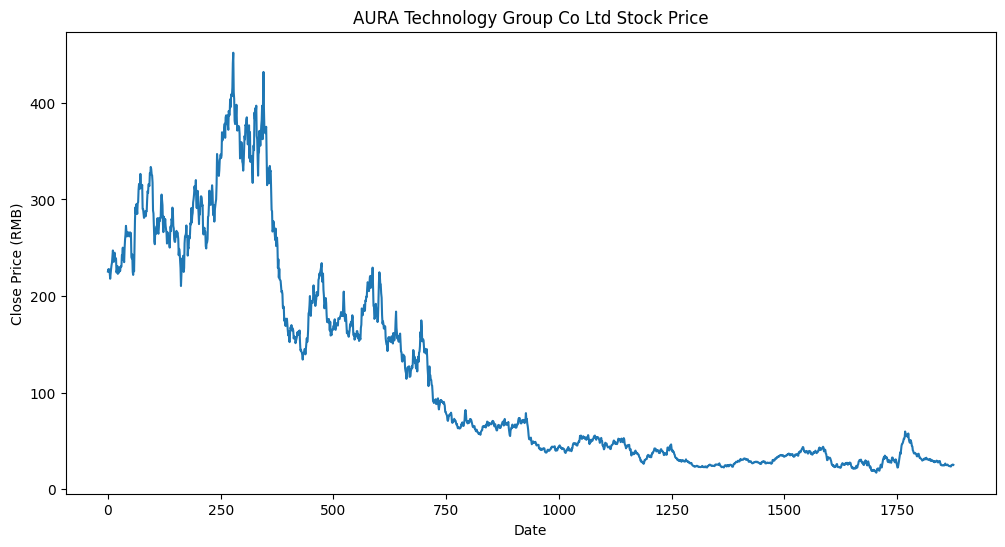

In [12]:
# AURA Technology Group Co Ltd
# 设置图形参数
plt.figure(figsize=(12, 6))
plt.title("AURA Technology Group Co Ltd Stock Price")
plt.xlabel("Date")
plt.ylabel("Close Price (RMB)")

# 绘制股票变化曲线
plt.plot(data2.index, data2['close'])

# 显示图形
plt.show()

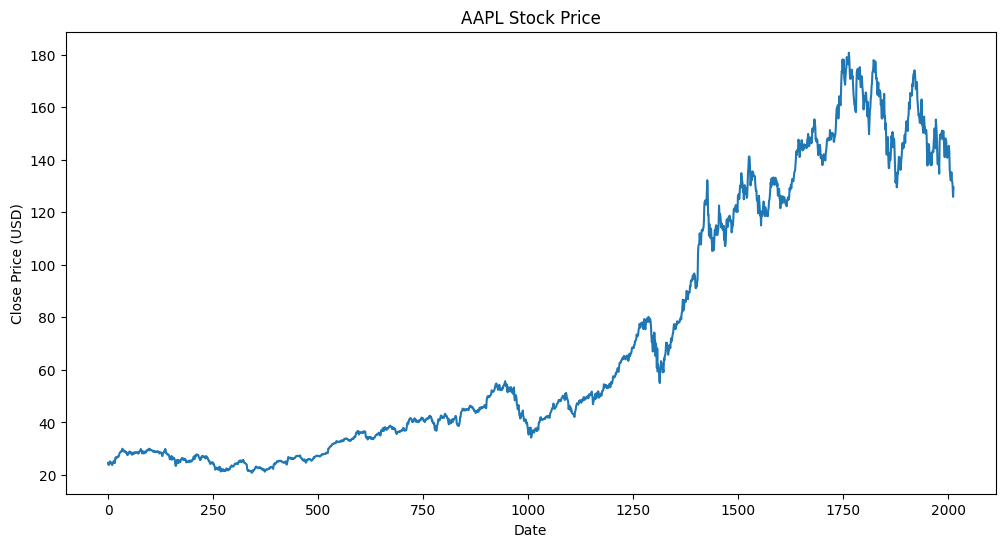

In [13]:
# AAPL
# 设置图形参数
plt.figure(figsize=(12, 6))
plt.title("AAPL Stock Price")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")

# 绘制股票变化曲线
plt.plot(data3.index, data3["Close"])

# 显示图形
plt.show()

In [ ]:
from graphviz import Digraph
L=[
    [1, 'AAPL', 1, 'Vanguard Group, Inc. (The)', 2, '8.08%'],
    [2, 'AAPL', 1, 'Blackrock Inc.', 2, '6.50%	'],
    [3, 'AAPL', 1, 'Berkshire Hathaway, Inc', 2, '5.66%'],
    [4, 'AAPL', 1, 'State Street Corporation', 2, '3.71%'],
    [5, 'AAPL', 1, 'FMR, LLC', 2, '2.03%']
]
dic={}
father_name_list=[]
child_name_list=[]
equity_portion_list=[]
for i1 in range(len(L)):
    M=L[i1]
    father_name=M[1]
    father_name_list.append(M[1])
    father_layer=M[2]
    child_name=M[3]
    child_name_list.append(M[3])
    child_layer=M[4]
    equity_portion=M[5]
    equity_portion_list.append(M[5])
    for x in father_name:
        dic[father_name]=father_layer   
    for y in child_name:
        dic[child_name]=child_layer     

name_layer_list = sorted(dic.items(), key=lambda x: x[1])

u=[]
for z in name_layer_list:
    company_name=z[0]
    layer=z[1]
    u.append(z[1])
number_of_layers=max(u) 

g=Digraph(name='Stocks Holder (>2%)')

for key in dic:
    for n in range(number_of_layers+1):
        if dic[key]==n:
            with g.subgraph() as layer_n:
                layer_n.attr(rank='same')
                layer_n.node(name=key,color='blue',shape='box',fontname='Microsoft YaHei')

for i2 in range(len(L)):
    g.edge(father_name_list[i2],child_name_list[i2],label=equity_portion_list[i2],color='red',fontname='Microsoft Yahei')
    
g.view()

'Stocks Holder (>2%).gv.pdf'

Error: no "view" mailcap rules found for type "application/pdf"
